In [1]:
# Importing Libraries
# Data handling and statistical analysis
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel
# Financial data
import quantstats as qs
import ta
import yfinance as yf
# Linear Regression Model
from sklearn.linear_model import LinearRegression
# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Datetime and hiding warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Getting daily returns for 4 different US stocks in the same time
#window
aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2010-07-01':'2023-03-23']
tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc['2010-07-01':'2023-03-23']
dis = qs.utils.download_returns('DIS')
dis = dis.loc['2010-07-01':'2023-03-23']
amd = qs.utils.download_returns('AMD')
amd = amd.loc['2010-07-01':'2023-03-23']

In [3]:
# Converting timezone
aapl.index = aapl.index.tz_convert(None)
tsla.index = tsla.index.tz_convert(None)
dis.index = dis.index.tz_convert(None)
amd.index = amd.index.tz_convert(None)




Apple Daily Returns Plot:



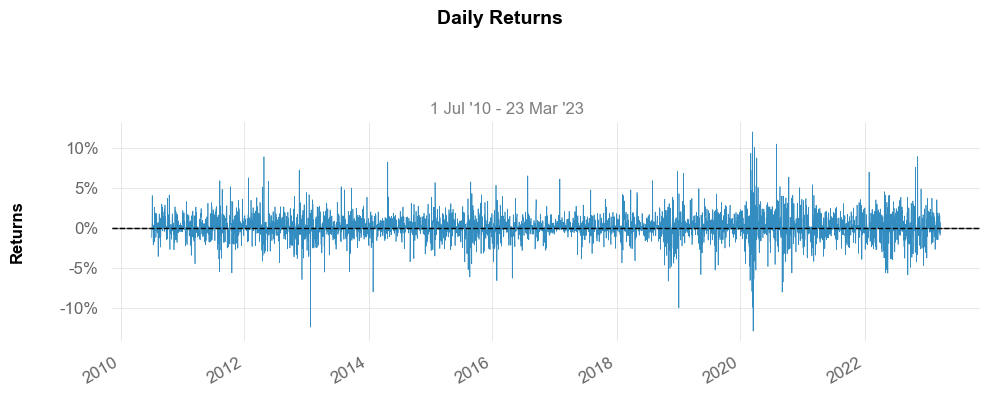






Tesla Inc. Daily Returns Plot:



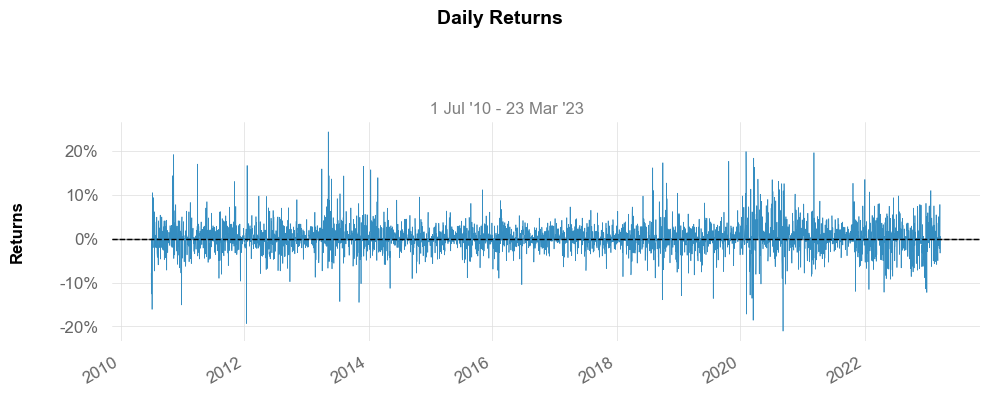






The Walt Disney Company Daily Returns Plot:



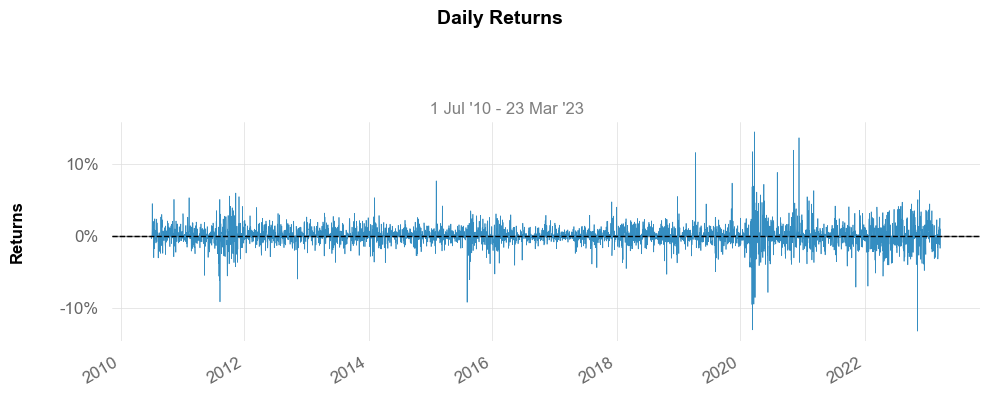






Advances Micro Devices, Inc. Daily Returns Plot:



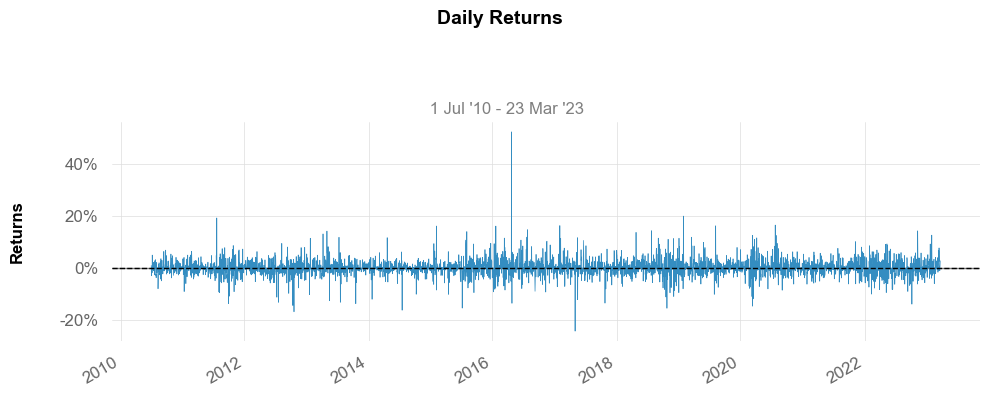

In [4]:
# Plotting Daily Returns for each stock
print('\n')
print('\nApple Daily Returns Plot:\n')
qs.plots.daily_returns(aapl)
print('\n')
print('\n')
print('\nTesla Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(tsla)
print('\n')
print('\n')
print('\nThe Walt Disney Company Daily Returns Plot:\n')
qs.plots.daily_returns(dis)
print('\n')
print('\n')
print('\nAdvances Micro Devices, Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(amd)

The plots above allow us to see an unusual variation in AMD stock
prices, an increase of around 40% in its shares by 2016, which may have
occurred for various factors, such as surprising earnings reports,
increased demand for the company's products, or favorable market
conditions. This behavior may indicate high volatility, thus marking it a
riskier investment.
On the other hand, Disney's and Apple's stocks seem more stable and
predictable investment options at first glance.

## Cumulative Returns




Apple Cumulative Returns Plot



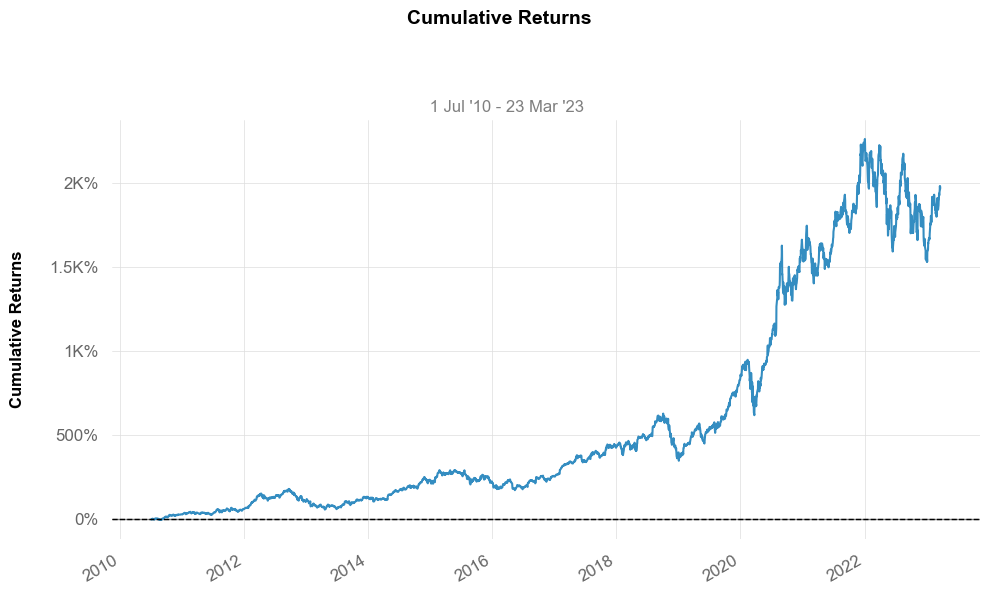






Tesla Inc. Cumulative Returns Plot



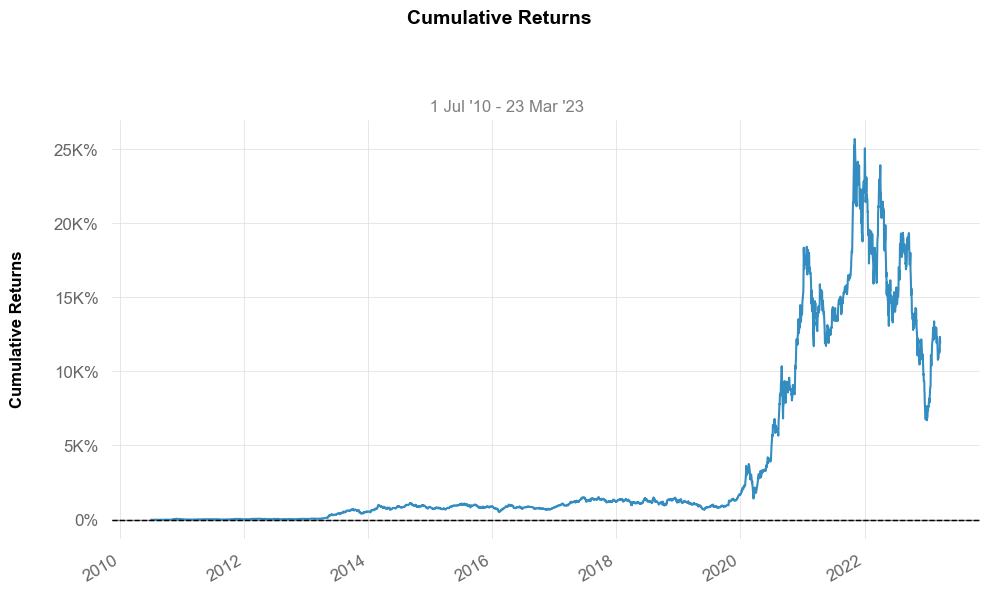






The Walt Disney Company Cumulative Returns Plot



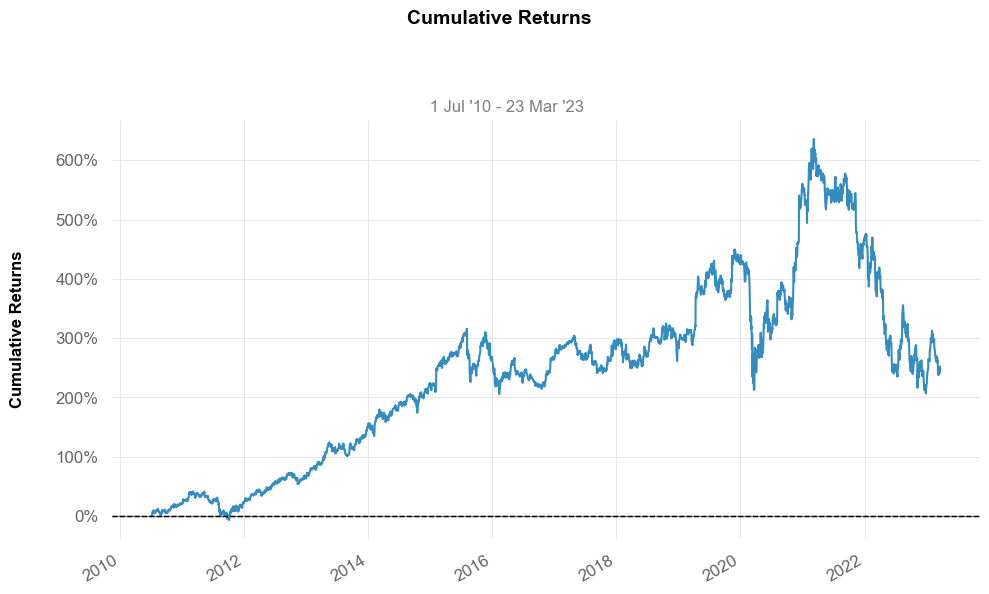






Advances Micro Devices, Inc. Cumulative Returns Plot



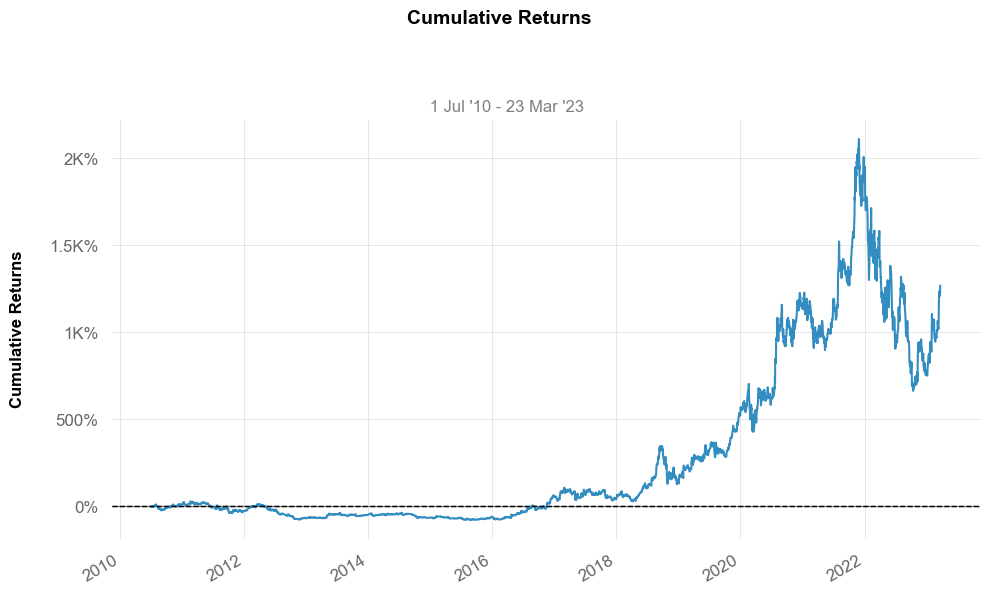

In [5]:
# Plotting Cumulative Returns for each stock
print('\n')
print('\nApple Cumulative Returns Plot\n')
qs.plots.returns(aapl)
print('\n')
print('\n')
print('\nTesla Inc. Cumulative Returns Plot\n')
qs.plots.returns(tsla)
print('\n')
print('\n')
print('\nThe Walt Disney Company Cumulative Returns Plot\n')
qs.plots.returns(dis)
print('\n')
print('\n')
print('\nAdvances Micro Devices, Inc. Cumulative Returns Plot\n')
qs.plots.returns(amd)

Advances Micro Devices, Inc. Cumulative Returns Plot
The charts above shows a considerate difference between Tesla's and
Disney's returns. At the peak of its returns, Tesla surpassed the mark of
over 25,000%, an extraordinary investment for those who bought the
company's shares by the beginning of the decade. On the other hand,
Disney's shares had some modest returns, peaking at around 650%.
Of course, when analyzing stocks data, we don't make an investment
merely looking only at the cumulative returns. It's crucial to look at
other indicators and evaluate the risks of the investment. Besides, 650%
returns are still significant, and in the stock market, slow but steady
growth can be just as valuable as explosive returns.
A variety of strategies must be taken into account in order to build a
robust portfolio.

## Histograms

as the range of daily returns of an asset over a certain
period, indicating its level of stability and volatility




Apple Daily Returns Histogram


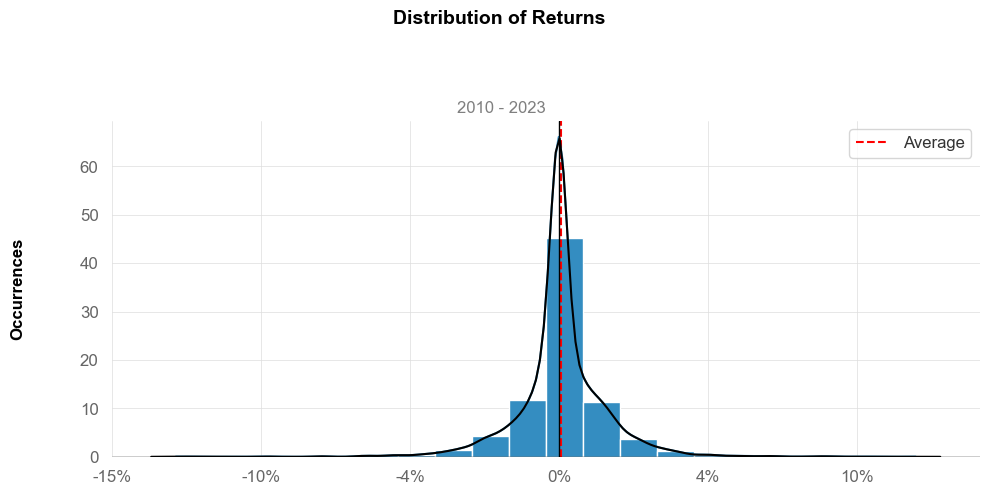




Tesla Inc. Daily Returns Histogram


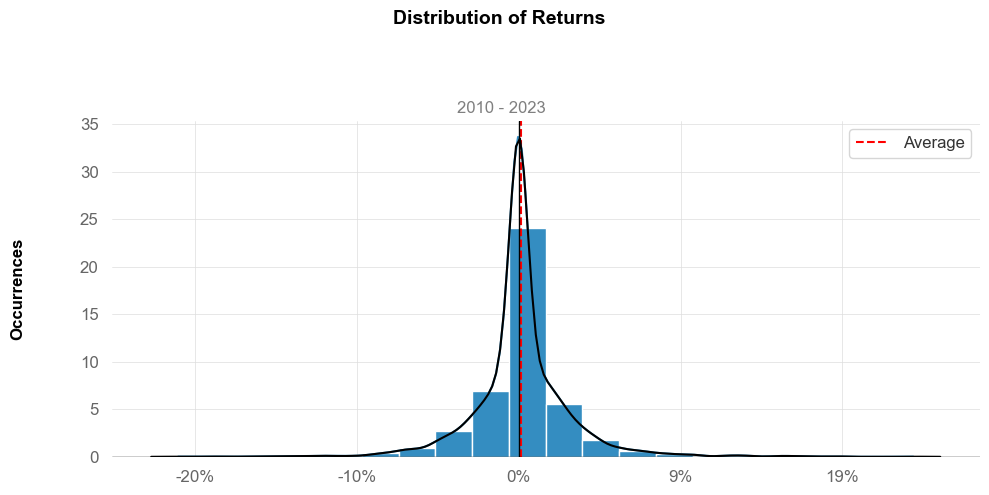




The Walt Disney Company Daily Returns Histogram


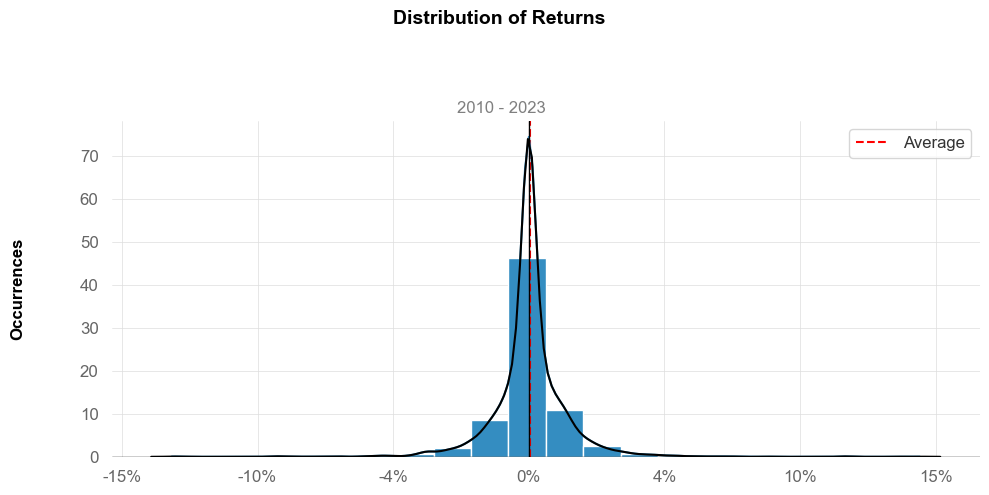




Advances Micro Devices, Inc. Daily Returns Histogram


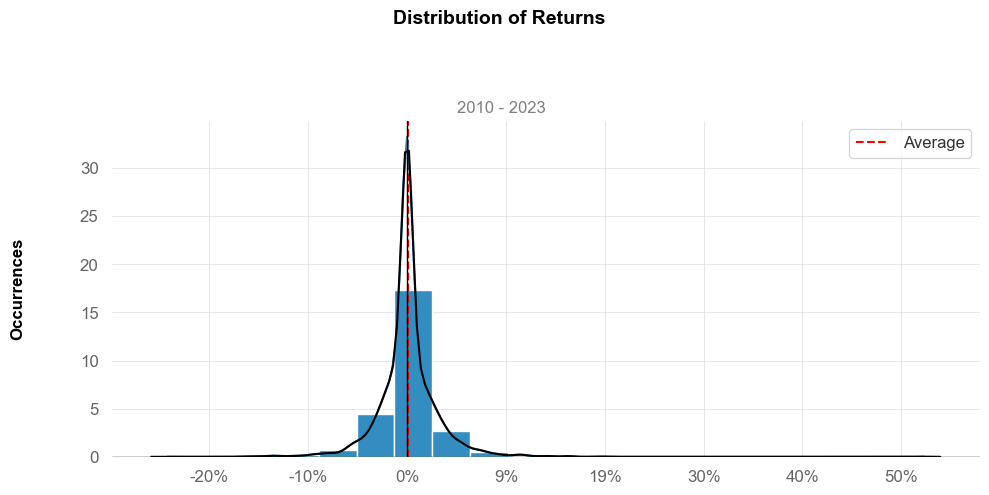

In [6]:
# Plotting histograms for daily returns
print('\n')
print('\nApple Daily Returns Histogram')
qs.plots.histogram(aapl, resample = 'D')
print('\n')
print('\nTesla Inc. Daily Returns Histogram')
qs.plots.histogram(tsla, resample = 'D')
print('\n')
print('\nThe Walt Disney Company Daily Returns Histogram')
qs.plots.histogram(dis, resample = 'D')
print('\n')
print('\nAdvances Micro Devices, Inc. Daily Returns Histogram')
qs.plots.histogram(amd, resample = 'D')

Advances Micro Devices, Inc. Daily Returns Histogram
Through the analysis of the histograms, we can observe that most daily
returns are close to zero in the center of the distribution. However, it's
easy to see some extreme values that are distant from the mean, which is
the case of AMD, with daily returns of around 50%, indicating the
presence of outliers in the positive range of the distribution, in contrast
with the negative field where it seems to limit at about -20%.
Disney's stocks have more balanced returns with values ranging from
-15% to 15%, while most returns are closer to the mean.
Through histograms, we can extract some valuable statistics such as
kurtosis and skewness.

## Kurtosis

A high kurtosis value for daily returns may indicate frequent
fluctuations in price that deviate significantly from the average returns
of that investment, which can lead to increased volatility and risk
associated with the stock.
A kurtosis value above 3.0 defines a leptokurtic distribution,
characterized by outliers and more values that are distant from the
average, which reflects in the histogram as stretching of the horizontal
axis. Stocks with a leptokurtic distribution are generally associated with
a higher level of risk but also offer the potential for higher returns due to
the substantial price movements that have occurred in the past.

Kurtosis measures the concentration of observations in the tails versus
the center of a distribution. In finance, a high level of excess kurtosis, or
"tail risk," represents the chance of a loss occurring as a result of a rare
event. This type of risk is important for investors to consider when
making investment decisions, as it may impact the potential returns and
stability of a particular stock.

In [7]:
# Using quantstats to measure kurtosis
print('\n')
print("Apple's kurtosis: ", qs.stats.kurtosis(aapl).round(2))
print('\n')
print("Tesla's kurtosis: ", qs.stats.kurtosis(tsla).round(2))
print('\n')
print("Walt Disney's kurtosis: ", qs.stats.kurtosis(dis).round(3))
print('\n')
print("Advances Micro Devices' kurtosis: ",
qs.stats.kurtosis(amd).round(3))



Apple's kurtosis:  5.25


Tesla's kurtosis:  4.99


Walt Disney's kurtosis:  10.957


Advances Micro Devices' kurtosis:  17.08


The kurtosis values above show that all four stocks, Apple, Tesla, Walt
Disney, and Advanced Micro Devices, have high levels of kurtosis,
indicating a high concentration of observations in the tails of their daily
returns distributions, which suggests that all four stocks are subject to
high levels of volatility and risk, with considerate price fluctuations that
deviate significantly from their average returns.
However, AMD has the highest kurtosis, with a value of 17.125, which
indicates that AMD is subject to an extremely high level of volatility and
tail risk, with a large concentration of extreme price movements. On the other hand, Disney has a kurtosis of 11.033, which is still higher than a
typical value for a normal distribution, but not as extreme as AMD's.


## Skewness

In [8]:
# Measuring skewness with quantstats
print('\n')
print("Apple's skewness: ", qs.stats.skew(aapl).round(2))
print('\n')
print("Tesla's skewness: ", qs.stats.skew(tsla).round(2))
print('\n')
print("Walt Disney's skewness: ", qs.stats.skew(dis).round(3))
print('\n')
print("Advances Micro Devices' skewness: ",
qs.stats.skew(amd).round(3))



Apple's skewness:  -0.07


Tesla's skewness:  0.33


Walt Disney's skewness:  0.198


Advances Micro Devices' skewness:  1.039


Generally, a value between -0.5 and 0.5 indicates a slight level of
skewness, while values below -1 and above 1 are indications of strong
asymmetry.

Apple, Tesla, and Disney are just slightly skewed, and Disney's slight
skewness can be seen by looking at the range of the x-axis of its
histogram, where it is pretty much balanced between -15% and 15%.
AMD stocks are strongly skewed, which can also be easily identified by
looking at the range between -20% and 50% in its histogram. AMD has a
lot of outliers on the positive tail, which could've been a good thing for
those who bought its shares but it also suggests higher volatility and risk
to this investment.

## Standard Deviation

applied to a stock's daily returns, it can
indicate the risk level associated with investing in that particular stock.
A stock exhibiting high daily return volatility, characterized by a high
standard deviation, is considered riskier when compared to one with low
daily return volatility, represented by a low standard deviation.

For instance, if two assets have similar average returns,
but one has a higher standard deviation, it is usually considered a riskier
investment. Hence, standard deviation serves as a useful tool in helping
investors to make informed decisions regarding their investment
choices and portfolio management

In [9]:
# Calculating Standard Deviations
print("\nApple's Standard Deviation from 2010 to 2023: ", round(float(aapl.std()), 3))
print('\n')
print("\nTesla's Standard Deviation from 2010 to 2023: ", round(float(tsla.std()), 3))
print('\n')
print("\nDisney's Standard Deviation from 2010 to 2023: ", round(float(dis.std()), 3))
print('\n')
print("\nAMD's Standard Deviation from 2010 to 2023: ", round(float(amd.std()), 3))



Apple's Standard Deviation from 2010 to 2023:  0.018



Tesla's Standard Deviation from 2010 to 2023:  0.036



Disney's Standard Deviation from 2010 to 2023:  0.016



AMD's Standard Deviation from 2010 to 2023:  0.036


Based on the values above, we can say that Apple and Disney are less
volatile than Tesla and AMD, suggesting that Apple and Disney are safer
investment options, exhibiting more stable price fluctuations in the
market.

## Airplots and Correlation Matrix

In [10]:
# Merging daily returns into one dataframe
merged_df = pd.concat([aapl, tsla, dis, amd], join = 'outer', axis =
1)
merged_df.columns = ['aapl', 'tsla', 'dis', 'amd']
merged_df 

,aapl,tsla,dis,amd
Date,,,,
2010-07-01 04:00:00,-0.012126,-0.078473,-0.000317,0.009563
2010-07-02 04:00:00,-0.006198,-0.125683,-0.003493,-0.029770
2010-07-06 04:00:00,0.006844,-0.160937,0.010835,-0.018131
2010-07-07 04:00:00,0.040381,-0.019243,0.044767,0.049716
2010-07-08 04:00:00,-0.002242,0.105064,0.006035,-0.002706
...,...,...,...,...
2023-03-17 04:00:00,-0.005454,-0.021724,-0.011560,0.012836
2023-03-20 04:00:00,0.015484,0.017321,0.010944,-0.010527
2023-03-21 04:00:00,0.011944,0.078199,0.024623,-0.009090


The dataframe above has dates serving as the index and each stock is
represented as a column, displaying their respective returns for each
specific day. This dataframe will be used to calculate the correlation
between these stocks and to create a pairplot visualization.

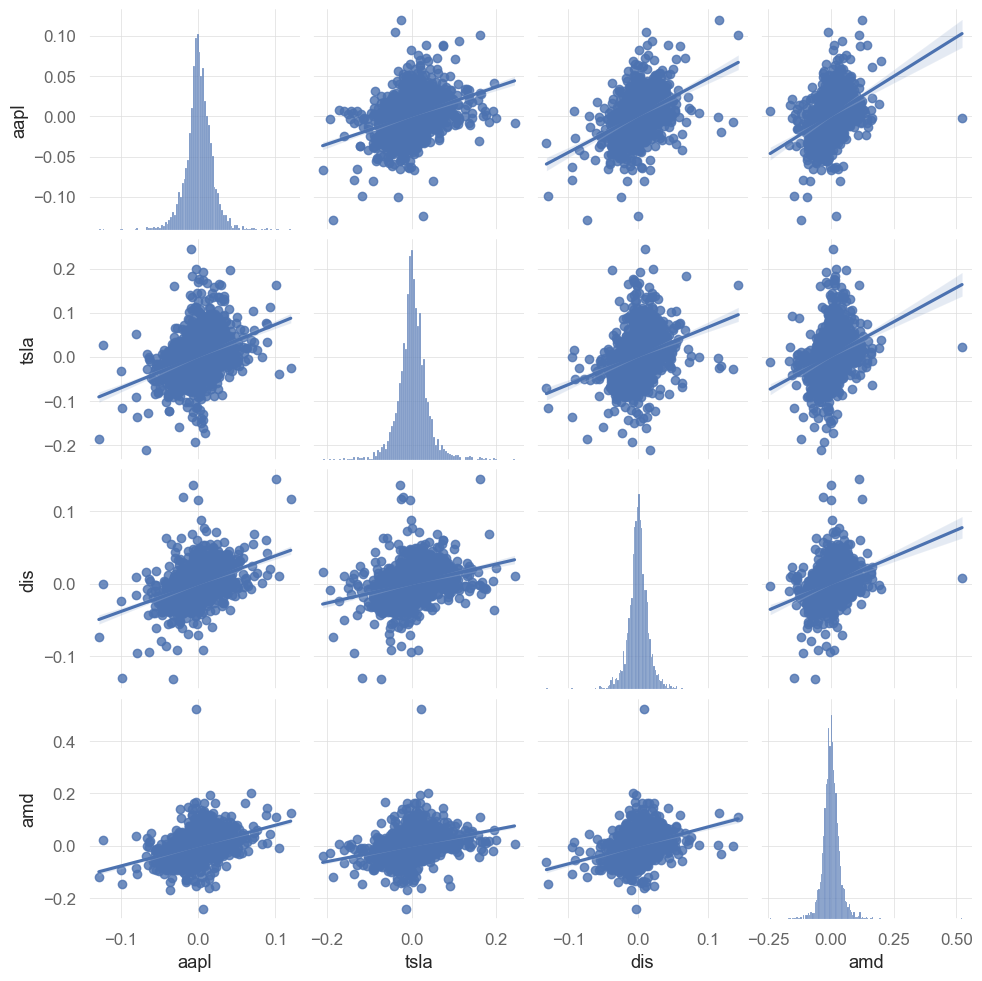

In [11]:
# Pairplots
sns.pairplot(merged_df, kind = 'reg')
plt.show()

<AxesSubplot:>

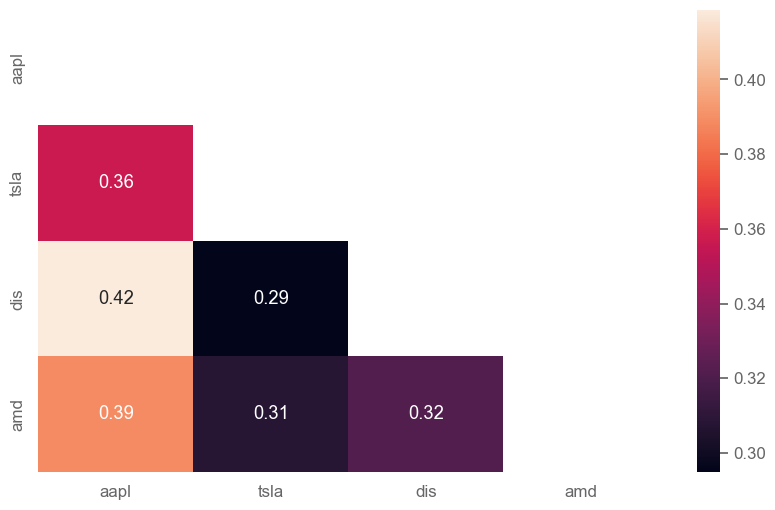

In [12]:
# Correlation Matrix
# Correlation Matrix
corr = merged_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask)

The stronger correlation among the assets above is between Disney and
Apple. However, a correlation of 0.42 is not a strong one.
It's important to note that there is not any negative correlation among
the assets above, which indicates that none of them acts to limit losses.
In the financial market, a hedge is an investment position intended to
offset potential losses by investing in assets that may have a negative
correlation with the others in a portfolio. Many investors buy gold to
serve as protection for riskier investments, such as stocks, and when the
market as a whole goes into a bear market, the gold tends to increase in
value, limiting potential losses for the overall portfolio

## Beta and Alpha

To determine Beta and Alpha, we require data from the SP500, which
acts as the benchmark, to fit a linear regression model between the
stocks and the index. This will enable us to extract the Beta and Alpha
values of the stocks.
Let's then load data on the SP500:

In [13]:


# Loading data from the SP500, the american benchmark
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2010-07-01':'2023-02-10']
sp500.index = sp500.index.tz_convert(None)
sp500
# Removing indexes
sp500_no_index = sp500.reset_index(drop = True)
aapl_no_index = aapl.reset_index(drop = True)
tsla_no_index = tsla.reset_index(drop = True)
dis_no_index = dis.reset_index(drop = True)
amd_no_index = amd.reset_index(drop = True)

In [14]:
sp500_no_index # Daily returns for the SP500

0      -0.003240
1      -0.004662
2       0.005359
3       0.031331
4       0.009413
          ...   
3171   -0.006140
3172    0.012873
3173   -0.011081
3174   -0.008830
3175    0.002195
Name: Close, Length: 3176, dtype: float64

In [15]:
aapl_no_index # Daily returns for Apple stocks without index

0      -0.012126
1      -0.006198
2       0.006844
3       0.040381
4      -0.002242
          ...   
3199   -0.005454
3200    0.015484
3201    0.011944
3202   -0.009103
3203    0.006969
Name: Close, Length: 3204, dtype: float64

We can use the Scikit-Learn's Linear Regression model to extract Beta
and Alpha from the analyzed stocks.

In [16]:
# Fitting linear relation among Apple's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = aapl_no_index.values.reshape(-1,1)
X = X[:3176]
y = y[:3176]

linreg = LinearRegression().fit(X, y)
beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('AAPL beta: ', beta.round(3))
print('\nAAPL alpha: ', alpha.round(3))



AAPL beta:  [1.111]

AAPL alpha:  [0.001]


In [17]:
# Fitting linear relation among Tesla's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = tsla_no_index.values.reshape(-1,1)
X = X[:3176]
y = y[:3176]
linreg = LinearRegression().fit(X, y)
beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('TSLA beta: ', beta.round(3))
print('\nTSLA alpha: ', alpha.round(3))



TSLA beta:  [1.377]

TSLA alpha:  [0.001]


In [18]:
# Fitting linear relation among Walt Disney's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = dis_no_index.values.reshape(-1,1)
X = X[:3176]
y = y[:3176]
linreg = LinearRegression().fit(X, y)
beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('Walt Disney Company beta: ', beta.round(3))
print('\nWalt Disney Company alpha: ', alpha.round(4))



Walt Disney Company beta:  [1.024]

Walt Disney Company alpha:  [0.0001]


In [19]:
# Fitting linear relation among AMD's returns and Benchmark
X = sp500_no_index.values.reshape(-1,1)
y = amd_no_index.values.reshape(-1,1)
X = X[:3176]
y = y[:3176]
linreg = LinearRegression().fit(X, y)
beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('AMD beta: ', beta.round(3))
print('\nAMD alpha: ', alpha.round(4))



AMD beta:  [1.603]

AMD alpha:  [0.0006]


Beta values for all the stocks are greater than 1, meaning that they are
more volatile than the benchmark and may offer higher returns, but also
come with greater risks. On the other hand, the alpha values for all the
stocks are small, close to zero, suggesting that there is little difference
between the expected returns and the risk-adjusted returns

 ## Sharpe Ratio
The Sharpe ratio is a measure of the risk-adjusted return of an
investment. It is calculated by dividing the average excess return of the
investment over the standard deviation of the returns, as shown by the
following equation:

In [20]:
# Calculating Sharpe ratio
print('\n')
print("Sharpe Ratio for AAPL: ", qs.stats.sharpe(aapl).round(2))
print('\n')
print("Sharpe Ratio for TSLA: ", qs.stats.sharpe(tsla).round(2))
print('\n')
print("Sharpe Ratio for DIS: ", qs.stats.sharpe(dis).round(2))
print('\n')
print("Sharpe Ratio for AMD: ", qs.stats.sharpe(amd).round(2))



Sharpe Ratio for AAPL:  0.98


Sharpe Ratio for TSLA:  0.94


Sharpe Ratio for DIS:  0.51


Sharpe Ratio for AMD:  0.64


Apple and Tesla have the highest Sharpe ratios among the stocks
analyzed, 0.97 and 0.95, respectively, indicating that these investments
offer a better risk-return relationship. However, none of the stocks have
a Sharp ratio above 1, which may suggest that these investments'
average returns are beneath the risk-free rate of return.
It's important to note that the Sharpe ratio is an annual metric and,
since the beginning of 2022, the market, in general, has been bearish,
with prices going down over the past year.

## Initial Conclusions

Some initial conclusions can be drawn via the analysis of the metrics
above:

- Apple and Tesla have the best Sharpe ratios, which indicates a better
risk-return relationship

- Tesla has the highest returns of them all, but it's also more volatile than
Apple and Disney;
- Apple has higher returns and low volatility compared to the other
assets. It has the best Sharpe ratio, low beta, low standard deviation,
and low asymmetry of returns;
- AMD is the riskier and more volatile investment option of the four. Its
returns distribution is highly asymmetric, it has a high standard
deviation value and high beta;
- Disney stocks may be a good option for investors that are sensitive to
risk, considering they had a steady and stable return over the period.



It's possible to say that, from all the assets analyzed, Apple offers the
best risk-return relationship, with high rentability and lower risk than
the other options.



## Building And Optimizing Portfollio

To start exploring portfolio construction and optimization, we ought to
build a portfolio consisting of the four stocks that have been analyzed so
far, with an initial weighting of 25% each.

In [21]:
weights = [0.25, 0.25, 0.25, 0.25] # Defining weights for each stock
portfolio = aapl*weights[0] + tsla*weights[1] + dis*weights[2] + amd*weights[3] 

In [22]:
portfolio # Displaying portfolio's daily returns

Date
2010-07-01 04:00:00   -0.020338
2010-07-02 04:00:00   -0.041286
2010-07-06 04:00:00   -0.040348
2010-07-07 04:00:00    0.028905
2010-07-08 04:00:00    0.026538
                         ...   
2023-03-17 04:00:00   -0.006475
2023-03-20 04:00:00    0.008305
2023-03-21 04:00:00    0.026419
2023-03-22 04:00:00   -0.010359
2023-03-23 04:00:00    0.012509
Name: Close, Length: 3204, dtype: float64

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2010-07-01  2010-07-01
End Period                 2023-03-23  2023-03-23
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      65.0%

Cumulative Return          3,548.36%   267.01%
CAGR﹪                     32.64%      10.75%

Sharpe                     1.08        0.66
Prob. Sharpe Ratio         99.99%      99.29%
Smart Sharpe               1.04        0.64
Sortino                    1.58        1.02
Smart Sortino              1.53        0.99
Sortino/√2                 1.12        0.72
Smart Sortino/√2           1.08        0.7
Omega                      1.21        1.21

Max Drawdown               -52.21%     -27.05%
Longest DD Days            442         416
Volatility (ann.)          30.59%      17.75%
R^2                        0.27        0.27
Information Ratio          0.05        0.05
Calmar                     0.63        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-04,2022-12-28,2023-03-23,442,-52.208458,-50.503597
2,2020-02-20,2020-03-18,2020-06-09,109,-39.974769,-38.637692
3,2012-03-28,2012-11-15,2013-05-06,404,-33.340370,-31.760466
4,2015-07-06,2016-02-10,2016-04-22,291,-28.967482,-27.003152
5,2018-10-02,2018-12-24,2019-07-03,274,-25.400782,-22.377624


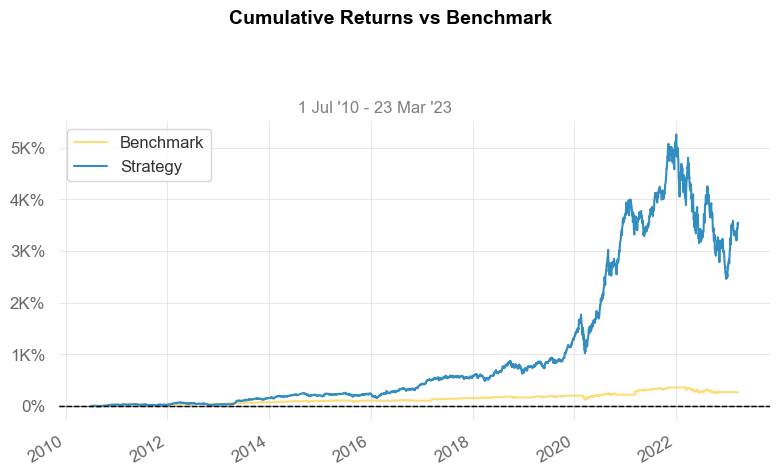

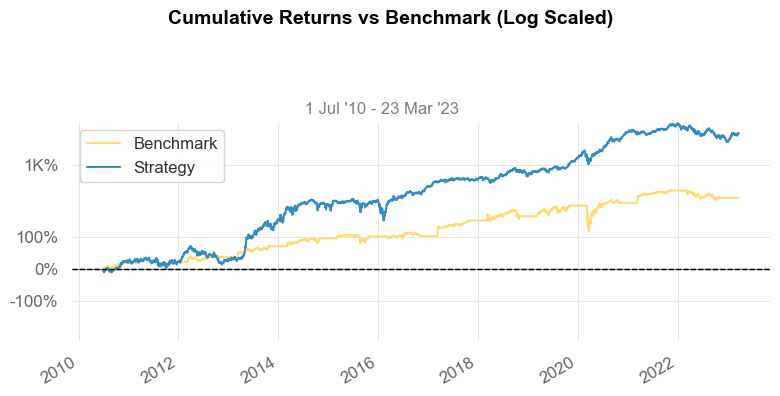

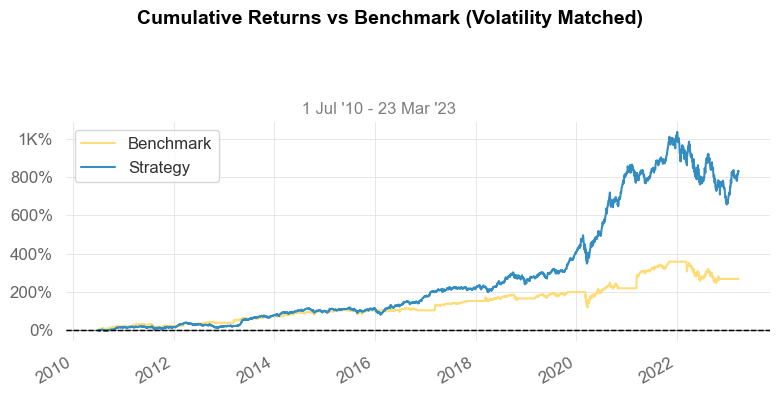

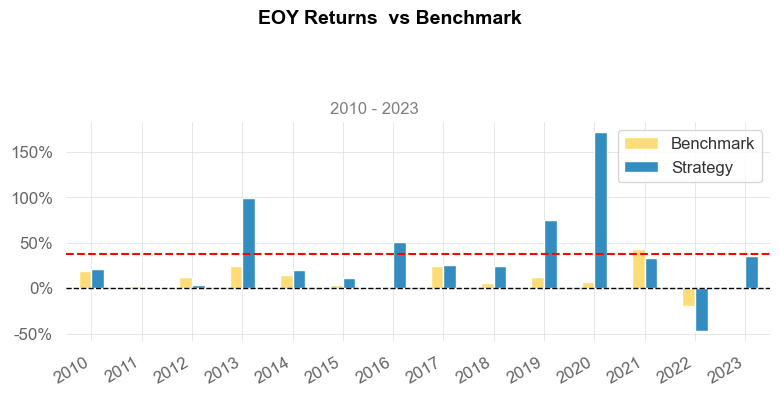

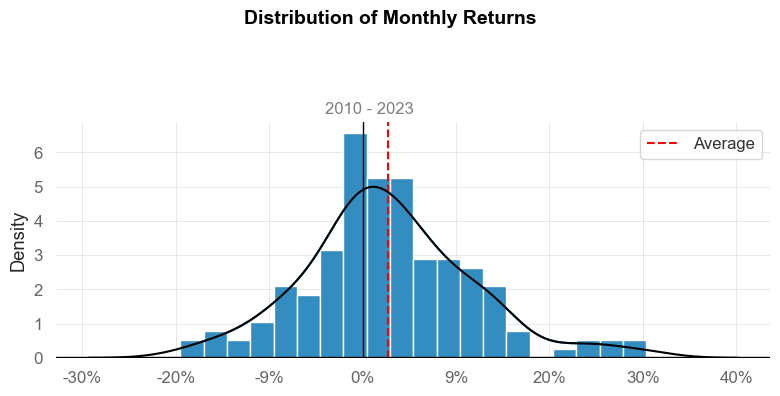

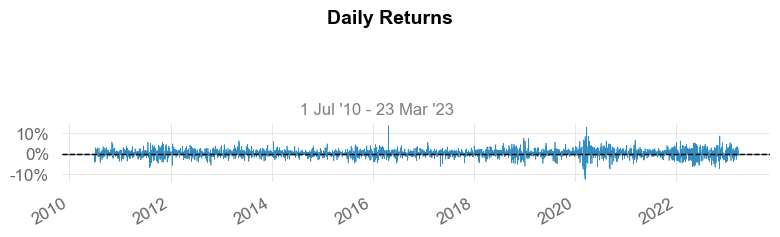

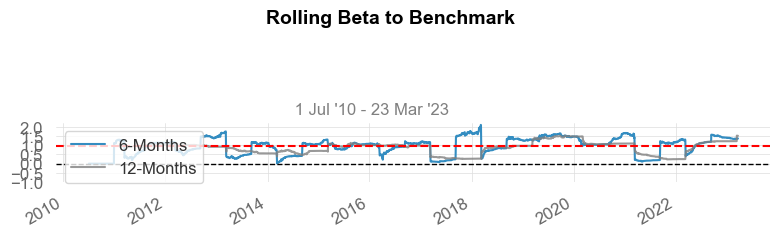

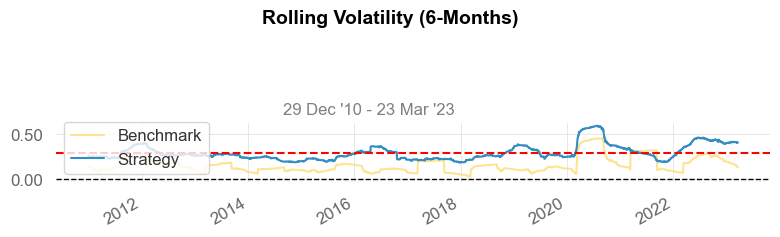

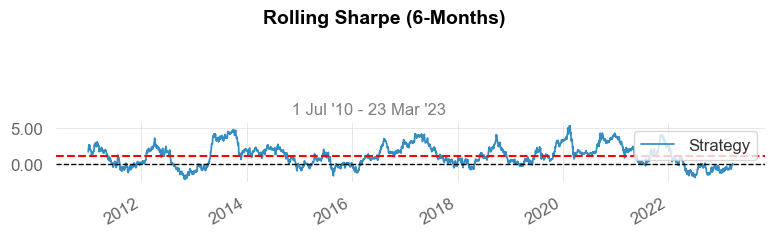

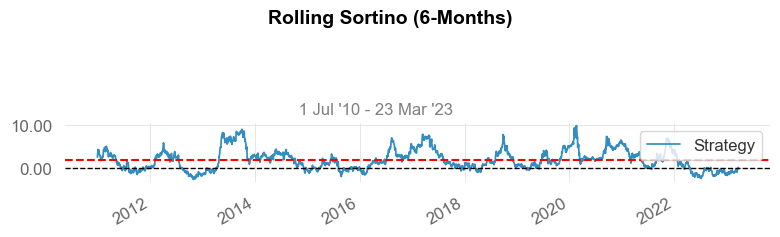

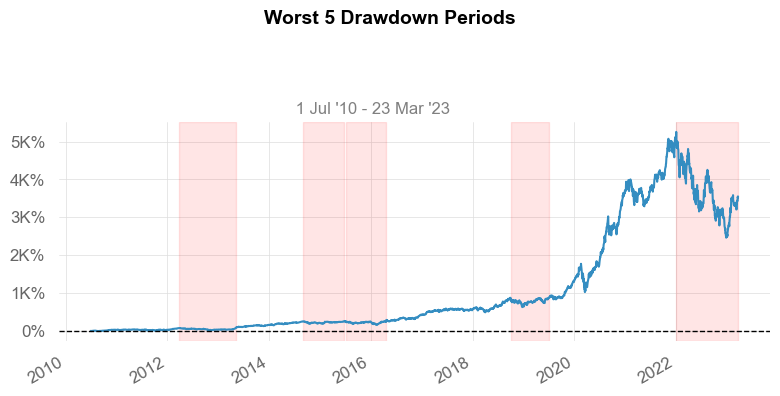

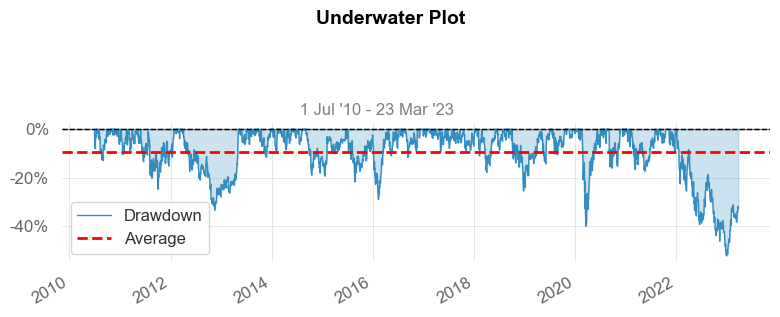

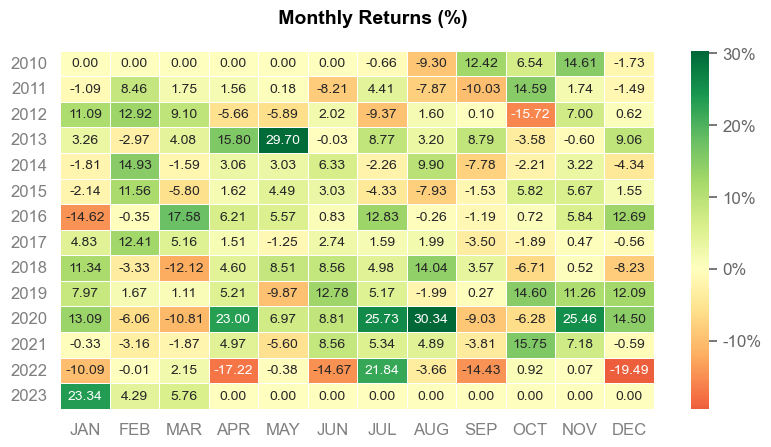

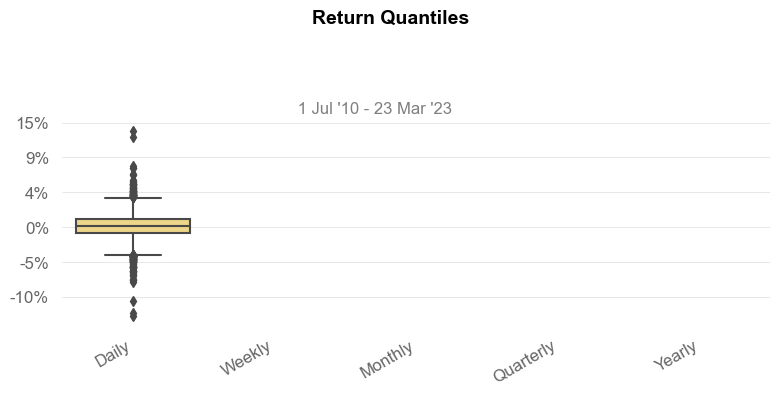

In [23]:
# Generating report on portfolio performance from July 1st, 2010 toFebruary 10th, 2023
qs.reports.full(portfolio, benchmark = sp500)

We have a range of metrics and plots available to look at. Firstly, the
Cumulative Return of the portfolio is higher than the benchmark, at
3,429.9% compared to 296.86% for the SP500. The Sharpe Ratio and
Sortino Ratio of the portfolio are also higher, indicating that it generates
better returns for the level of risk taken. In addition, the portfolio has
higher expected daily, monthly and annual returns than the SP500, and
its best day, month, and year outperforms the benchmark's best day,
month, and year.
However, the portfolio's maximum drawdown is greater than the
benchmark, at -52.21% compared to -33.92%. This indicates that the
portfolio has experienced larger losses at times than the benchmark. 

The annualized volatility of the portfolio is also higher, at around 30.59%
compared to the benchmark's 17.96%.
While the portfolio has higher returns on its best day, month, and year,
it also has bigger losses on its worst day, month, and year compared to
the benchmark. The beta of 1.28 shows that the portfolio is about 28%
more volatile than the overall market, and its 73.94% correlation
indicates a strong positive relationship among the four stocks,
suggesting that they tend to move in the same direction, which could
increase the systemic risk of the portfolio.
Overall, the portfolio has generated impressive returns, but it also
comes with a higher degree of risk and volatility. This prompts the
question of whether or not it's possible to optimize the portfolio to
reduce risk and volatility while also increasing returns.

## Optimizing Portfolio

In [24]:
# Getting dataframes info for Stocks using yfinance
aapl_df = yf.download('AAPL', start = '2010-07-01', end = '2023-02-11')
tsla_df = yf.download('TSLA', start = '2010-07-01', end = '2023-02-11')
dis_df = yf.download('DIS', start = '2010-07-01', end = '2023-02-11')
amd_df = yf.download('AMD', start = '2010-07-01', end = '2023-02-11')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
# Extracting Adjusted Close for each stock
aapl_df = aapl_df['Adj Close']
tsla_df = tsla_df['Adj Close']
dis_df = dis_df['Adj Close']
amd_df = amd_df['Adj Close']

In [26]:
# Merging and creating an Adj Close dataframe for stocks
df = pd.concat([aapl_df, tsla_df, dis_df, amd_df], join = 'outer',
axis = 1)
df.columns = ['aapl', 'tsla', 'dis', 'amd']
df # Visualizing dataframe for input

,aapl,tsla,dis,amd
Date,,,,
2010-07-01,7.553068,1.464000,27.428724,7.390000
2010-07-02,7.506256,1.280000,27.332909,7.170000
2010-07-06,7.557628,1.074000,27.629057,7.040000
2010-07-07,7.862814,1.053333,28.865929,7.390000
2010-07-08,7.845185,1.164000,29.040125,7.370000
...,...,...,...,...
2023-02-06,151.498688,194.759995,109.870003,83.680000
2023-02-07,154.414230,196.809998,111.629997,85.910004
2023-02-08,151.688400,201.289993,111.779999,84.690002


In [27]:
# Importing libraries for portfolio optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

## Markowitz Mean-Variance Optimization Mode

In [28]:
# Calculating the annualized expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(df) #expected returns
S = risk_models.sample_cov(df) #Covariance matrix
# Visualizing the annualized expected returns
mu

aapl    0.268385
tsla    0.475549
dis     0.114966
amd     0.209862
dtype: float64

In [29]:
# Visualizing the covariance matrix
S

,aapl,tsla,dis,amd
aapl,0.081699,0.058321,0.031096,0.063529
tsla,0.058321,0.329160,0.043762,0.101222
dis,0.031096,0.043762,0.068223,0.047868
amd,0.063529,0.101222,0.047868,0.326817


In [30]:
# Optimizing for maximal Sharpe ratio
ef = EfficientFrontier(mu, S) # Providing expected returns and covariance matrix as input
weights = ef.max_sharpe() # Optimizing weights for Sharpe ratio maximization
clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

In [31]:
clean_weights

OrderedDict([('aapl', 0.70828), ('tsla', 0.29172), ('dis', 0.0), ('amd', 0.0)])

After running the optimizer, it resulted in an optimized weighting for a
portfolio where 70.83% of its allocation is invested in Apple stocks, and
the remaining 29.17% invested in Tesla stocks. No allocation was made
to Disney or AMD.
With the optimized weights in hand, we can construct a new portfolio
and use Quantstats to compare its performance to that of the previously
constructed portfolio.

In [32]:
# Creating new portfolio with optimized weights
new_weights = [0.70828, 0.29172]
optimized_portfolio = aapl*new_weights[0] + tsla*new_weights[1]
optimized_portfolio # Visualizing daily returns

Date
2010-07-01 04:00:00   -0.031481
2010-07-02 04:00:00   -0.041054
2010-07-06 04:00:00   -0.042102
2010-07-07 04:00:00    0.022988
2010-07-08 04:00:00    0.029061
                         ...   
2023-03-17 04:00:00   -0.010200
2023-03-20 04:00:00    0.016020
2023-03-21 04:00:00    0.031272
2023-03-22 04:00:00   -0.015941
2023-03-23 04:00:00    0.006569
Name: Close, Length: 3204, dtype: float64

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2010-07-01  2010-07-01
End Period                 2023-03-23  2023-03-23
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          4,992.28%   3,548.36%
CAGR﹪                     36.16%      32.64%

Sharpe                     1.17        1.08
Prob. Sharpe Ratio         100.0%      99.99%
Smart Sharpe               1.12        1.04
Sortino                    1.72        1.58
Smart Sortino              1.65        1.52
Sortino/√2                 1.21        1.12
Smart Sortino/√2           1.17        1.08
Omega                      1.22        1.22

Max Drawdown               -45.96%     -52.21%
Longest DD Days            566         442
Volatility (ann.)          30.5%       30.59%
R^2                        0.74        0.74
Information Ratio          0.01        0.01
Calmar                     0.79    

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-04,2023-01-03,2023-03-23,442,-45.956182,-44.384221
2,2020-02-20,2020-03-23,2020-06-01,101,-37.293192,-36.695395
3,2015-07-21,2016-02-10,2017-02-06,566,-33.810391,-32.844637
4,2018-11-02,2019-01-03,2019-10-22,354,-29.444361,-27.889061
5,2012-09-18,2013-03-04,2013-05-13,237,-27.126578,-25.178793


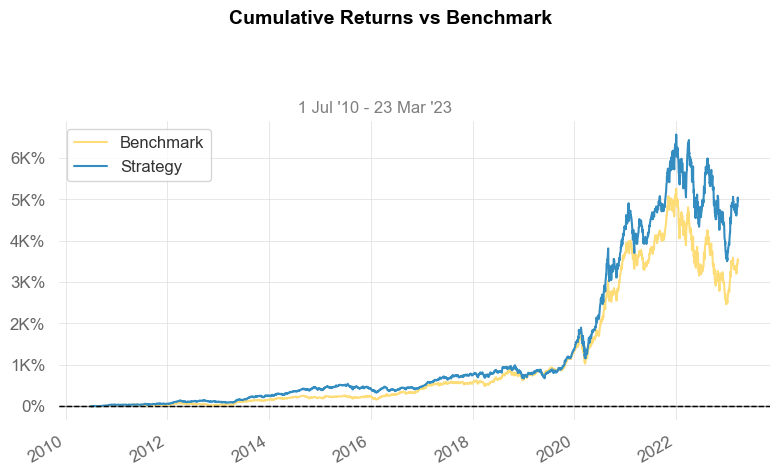

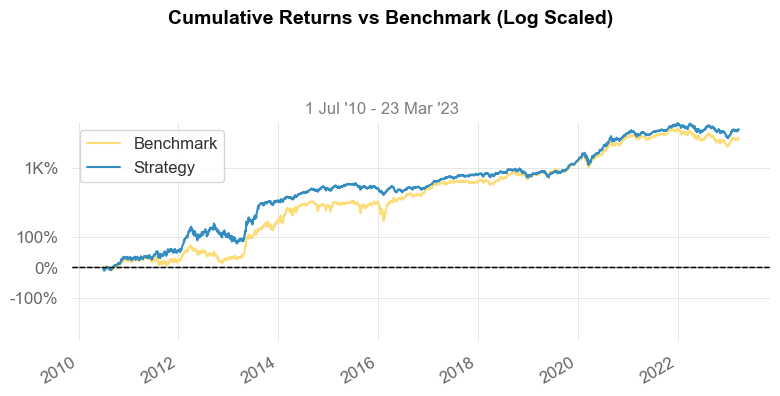

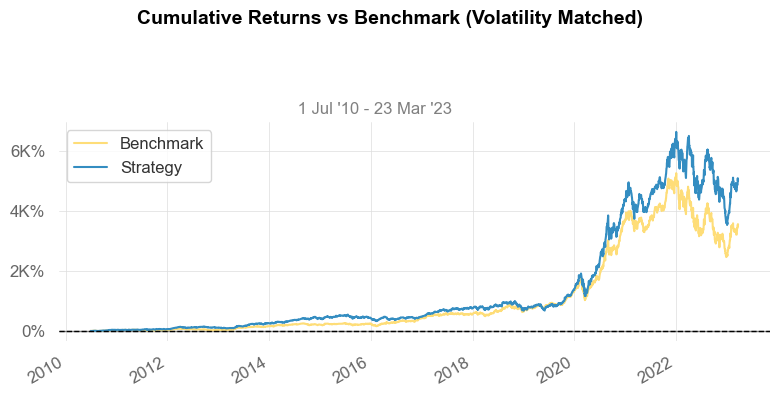

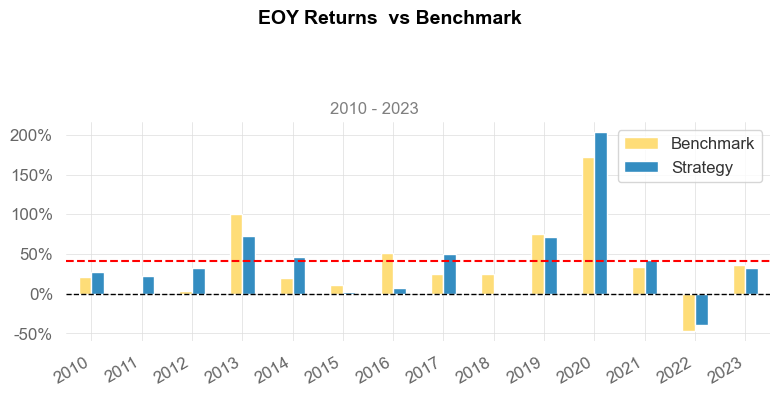

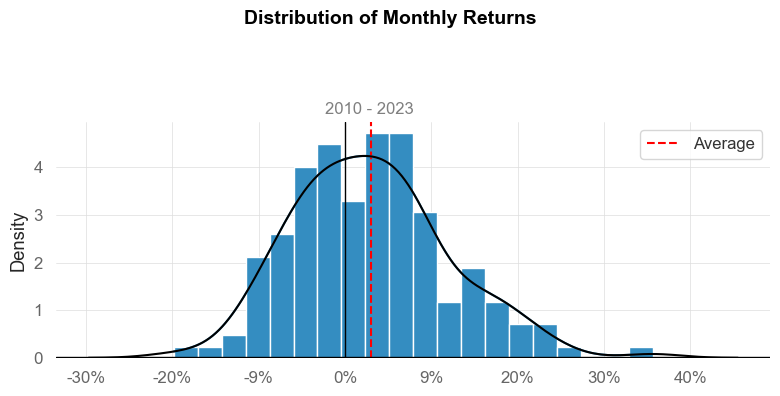

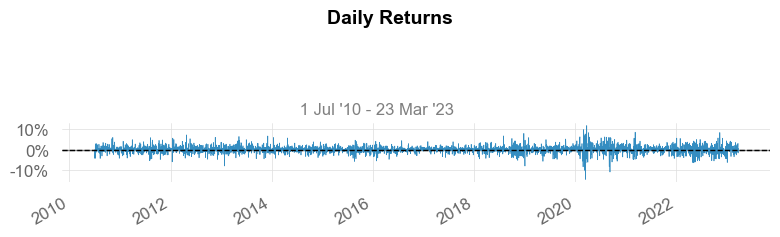

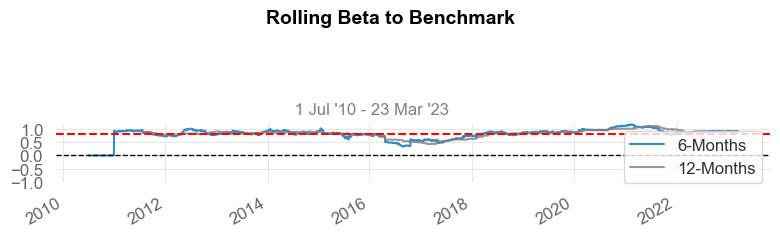

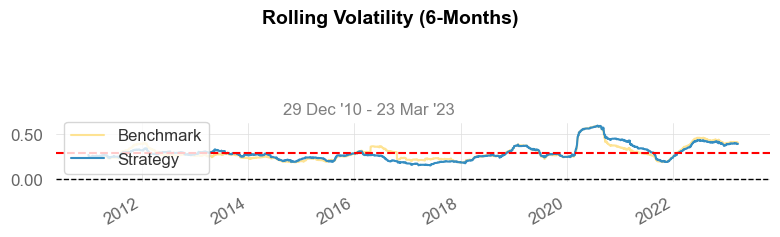

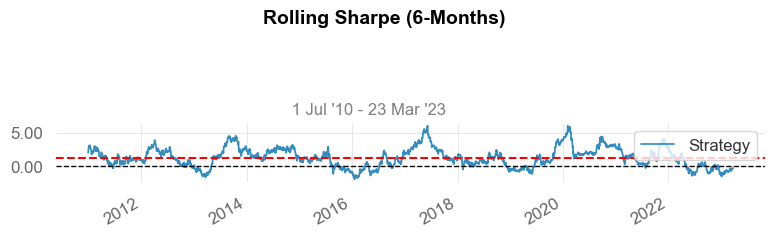

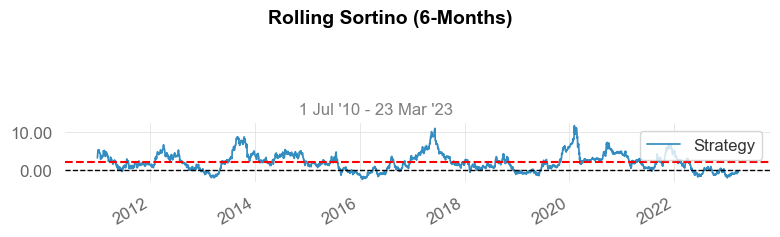

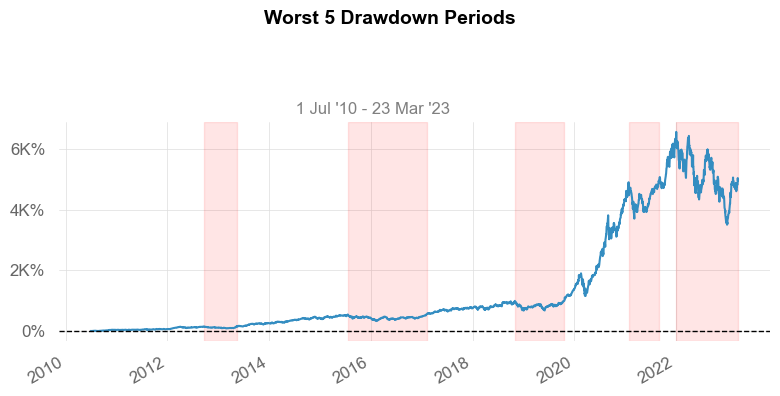

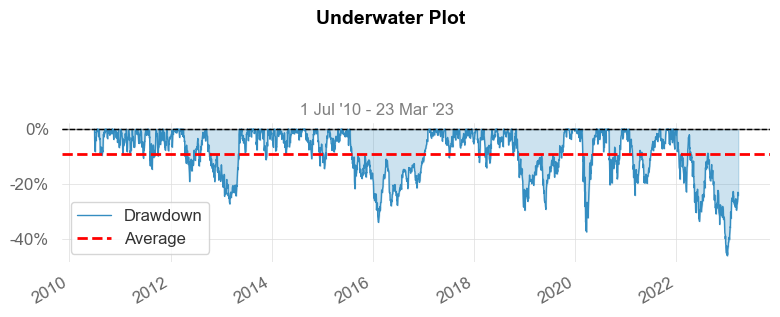

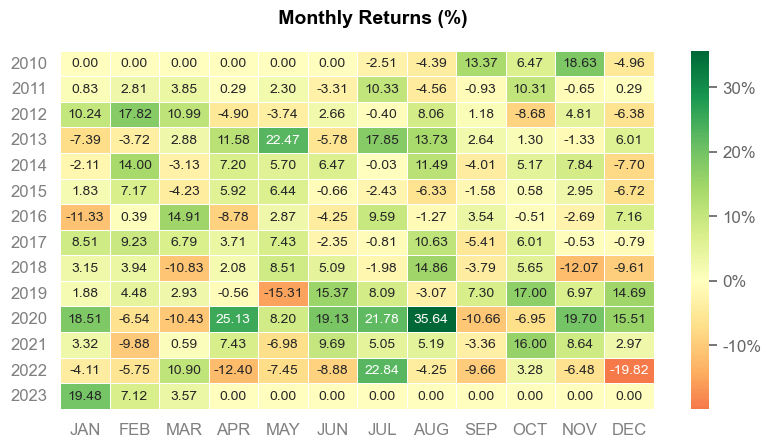

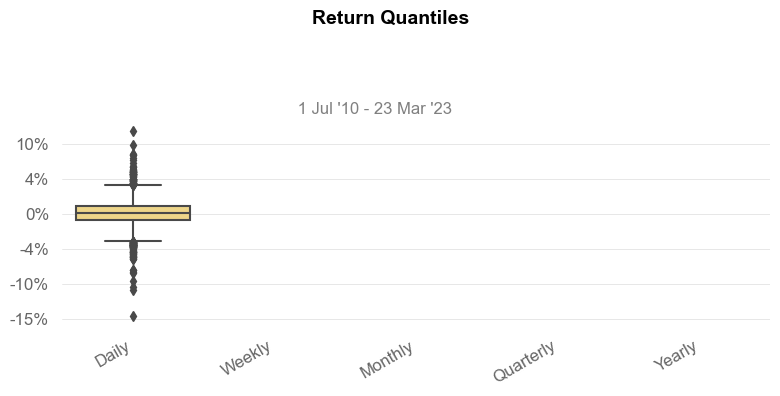

In [33]:
# Displaying new reports comparing the optimized portfolio to the first portfolio constructed
qs.reports.full(optimized_portfolio, benchmark = portfolio)

Based on the report above, the optimized portfolio appears to have
performed better than the original portfolio. Here are some key
conclusions that can be drawn by looking at the metrics and plots in the
report:

. Cumulative Return: The optimized portfolio has generated a
significantly higher cumulative return of 4,830.76% compared to
3,429.90% for the original portfolio. This means that the an investment
in the optimized portfolio would have provided higher earnings for
investors compared to the original portfolio.

CAGR: The compounded annual growth rate (CAGR) of the optimized
portfolio is higher at 36.18% compared to 32.62% for the original
portfolio. This suggests that the optimized portfolio has generated a
higher rate of return per year over the entire investment period.

Sharpe Ratio: The optimized portfolio has a slightly higher Sharpe
ratio of 1.17 compared to 1.08 for the original portfolio, indicating that it
has generated a better risk-adjusted return.

Drawdown: The maximum drawdown for the optimized portfolio is
lower at -45.96% compared to -52.21% for the original portfolio. This
means that the optimized portfolio experienced lower losses during the
worst period of performance.

Recovery Factor: The recovery factor for the optimized portfolio is
much higher at 105.12 compared to 65.7 for the original portfolio, which
suggests that the optimized portfolio was able to recover from
drawdowns more quickly and generate higher returns after experiencing
losses.

Beta: The optimized portfolio's beta of 0.86 indicates that the
optimized portfolio is less volatile than the overall market, and much
less volatile than the previously built portfolio

Annual Volatility: The optimized portfolio has a slightly lower
annual volatility than the original portfolio, with 30.52% compared to
30.59%, respectively.